In [1]:
# September 20, 2017
# Udemy Machine Learning A-Z
# SVM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import pandas as pd

In [3]:
datasocial = pd.read_csv('Social_Network_Ads.csv')
datasocial.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = datasocial.iloc[:, 2:4].values
y = datasocial.iloc[:, -1].values

In [5]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.preprocessing import StandardScaler

scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.fit_transform(x_test)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
from sklearn.svm import SVC

model_svm = SVC(kernel = 'rbf', random_state = 0)

In [8]:
model_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
y_pred = model_svm.predict(x_test)

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[64,  4],
       [ 3, 29]])

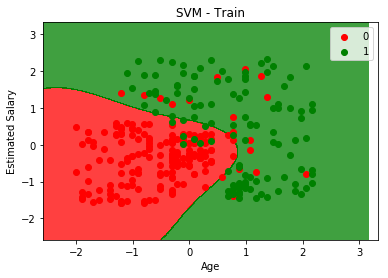

In [11]:
# Visualizing the Results Training Set

from matplotlib.colors import ListedColormap # library to create mesh grid

x_set, y_set = x_train, y_train # renaming to make it easier to make several maps

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

# above lines establish the range of values; +/- 1 to avoid squeezing data on the edges of the plot
# these correspond to the fills

plt.contourf(x1, x2, model_svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green'))) # this actually fills the plot

plt.xlim(x1.min(), x1.max())

plt.xlim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j) # plot each data point
    
plt.title('SVM - Train')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

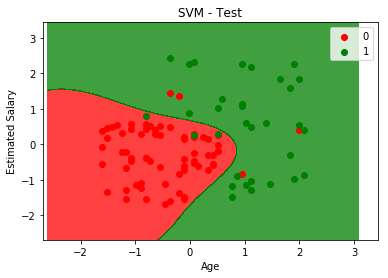

In [12]:
# Visualizing the Results for Testing Set

from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, model_svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())

plt.xlim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('SVM - Test')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()